# Sprint 11 - Proyecto
Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

## Descripción de los datos
Cada entrada de registro es una acción de usuario o un evento.

    EventName: nombre del evento.
    DeviceIDHash: identificador de usuario unívoco.
    EventTimestamp: hora del evento.
    ExpId: número de experimento. 
        246 y 247 son los grupos de control
        248 es el grupo de prueba.

## Instrucciones para completar el proyecto

## Paso 1. Abrir el archivo de datos & leer la información general

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
from scipy import stats as st

In [40]:
registro = pd.read_csv("/datasets/logs_exp_us.csv", sep="\t")

In [41]:
registro.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [42]:
registro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


## Paso 2. Preparar los datos para el análisis

In [43]:
# Renombrando las columnas
registro.rename(columns={'EventName': 'event_name', 
                        'DeviceIDHash': 'device_id',
                        'EventTimestamp': 'event_timestamp',
                        'ExpId': 'experimento'}, inplace=True
              )

In [44]:
registro.head(3)

,event_name,device_id,event_timestamp,experimento
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248


In [45]:
# Cambiando la columna de evento_date a formato de fecha y hora
registro['event_timestamp'] = pd.to_datetime(registro['event_timestamp'], unit='s')
registro['event_timestamp'] = registro['event_timestamp'].dt.floor('H')
registro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id        244126 non-null  int64         
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   experimento      244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


In [46]:
registro.head()

,event_name,device_id,event_timestamp,experimento
0,MainScreenAppear,4575588528974610257,2019-07-25 04:00:00,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:00:00,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:00:00,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:00:00,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:00:00,248


In [47]:
# Registro de la columna solo registro['fecha']
registro['fecha'] = registro['event_timestamp'].dt.date
registro['fecha'] = pd.to_datetime(registro['fecha'], format='%Y-%m-%d')
registro.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id        244126 non-null  int64         
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   experimento      244126 non-null  int64         
 4   fecha            244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [48]:
# Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.
print(registro.isna().sum()) 

event_name         0
device_id          0
event_timestamp    0
experimento        0
fecha              0
dtype: int64


In [49]:
# Buscar por duplicados
print(registro.duplicated().sum())

145284


In [50]:
# Eliminando duplicados
clean_registro = registro.drop_duplicates()
clean_registro

,event_name,device_id,event_timestamp,experimento,fecha
0,MainScreenAppear,4575588528974610257,2019-07-25 04:00:00,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:00:00,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:00:00,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:00:00,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:00:00,248,2019-07-25
...,...,...,...,...,...
244110,OffersScreenAppear,5317814261427487562,2019-08-07 21:00:00,248,2019-08-07
244112,MainScreenAppear,8945389877779498724,2019-08-07 21:00:00,246,2019-08-07
244113,OffersScreenAppear,8945389877779498724,2019-08-07 21:00:00,246,2019-08-07
244119,MainScreenAppear,5746969938801999050,2019-08-07 21:00:00,246,2019-08-07


## Paso 3. Estudiar y comprobar los datos

### 3.1 Cantidad de eventos que hay en los registros

In [51]:
# Total de eventos hay registrados
total_eventos = (
    clean_registro
        .groupby('event_name')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Únicos'})
)
total_eventos

,Usuarios Únicos
event_name,
CartScreenAppear,3749
MainScreenAppear,7439
OffersScreenAppear,4613
PaymentScreenSuccessful,3547
Tutorial,847


### 3.2 Cantidad de usuarios hay en los registros

In [52]:
# Contar usuarios únicos en la columna
total_usuarios = (
    clean_registro
        .groupby('experimento')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Únicos'})
)
total_usuarios

,Usuarios Únicos
experimento,
246,2489
247,2520
248,2542


### 3.3 Promedio de eventos por usuario

In [53]:
# Promedio de eventos por usuario
# Paso 1: Contar eventos por usuario
eventos_por_usuario = clean_registro['device_id'].value_counts() 

# Paso 2: Calcular el promedio
promedio_eventos = eventos_por_usuario.mean()

print(f"Promedio de eventos por usuario: {promedio_eventos:.2f}")

Promedio de eventos por usuario: 13.09


### 3.4 Periodo de tiempo cubren los datos. Encuentra la fecha máxima y mínima. 

In [54]:
clean_registro.head()

,event_name,device_id,event_timestamp,experimento,fecha
0,MainScreenAppear,4575588528974610257,2019-07-25 04:00:00,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:00:00,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:00:00,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:00:00,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:00:00,248,2019-07-25


In [55]:
print(f"Fecha minima:", clean_registro['event_timestamp'].min())
print(f"Fecha maxima:", clean_registro['event_timestamp'].max())

Fecha minima: 2019-07-25 04:00:00
Fecha maxima: 2019-08-07 21:00:00


In [56]:
# Que periodo de tiempo cubren los datos
registros_x_fecha = (
    clean_registro
        .groupby('fecha')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Únicos'})
)
registros_x_fecha.sort_values(by='Usuarios Únicos', ascending=False).head(5)

,Usuarios Únicos
fecha,
2019-08-06,3922
2019-08-05,3802
2019-08-01,3703
2019-08-07,3651
2019-08-02,3647


<Figure size 1200x600 with 0 Axes>

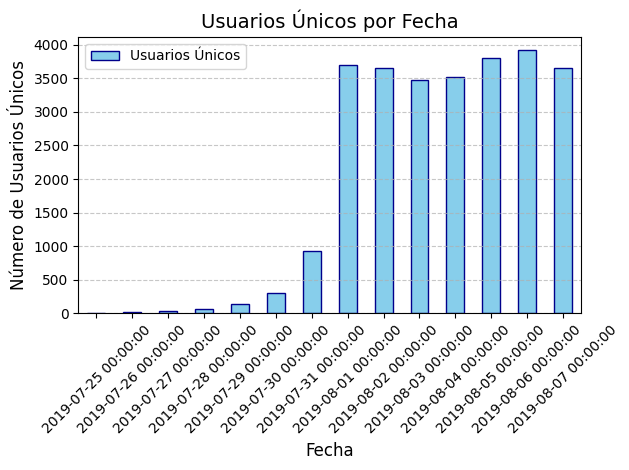

In [57]:
# Configurar el gráfico
plt.figure(figsize=(12, 6))
registros_x_fecha.plot(kind='bar', color='skyblue', edgecolor='darkblue') 
plt.title('Usuarios Únicos por Fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Usuarios Únicos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Análisis de resultados:

A partir del 30 de julio se observa un cambio significativo en el comportamiento de los usuarios. Los datos entre el 25 y el 29 de julio muestran una baja actividad, probablemente relacionada con una etapa previa al lanzamiento formal o con una baja visibilidad inicial. Dado su bajo volumen, pueden considerarse no representativos del comportamiento real y ser excluidos del análisis principal.

Desde el 30 de julio, el número de usuarios únicos se estabiliza por encima de los 934 diarios, indicando que el sistema alcanzó su nivel operativo estable, posiblemente debido a una campaña de marketing, mejoras técnicas, o simplemente mayor conocimiento del producto. Esta etapa es clave para el análisis de comportamiento real de los usuarios.

In [58]:
# Que periodo de tiempo cubren los datos
registros_x_fecha_hora = (
    clean_registro
        .groupby('event_timestamp')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Únicos'})
)
registros_x_fecha_hora.sort_values(by='Usuarios Únicos', ascending=False).head(5)

,Usuarios Únicos
event_timestamp,
2019-08-06 14:00:00,553
2019-08-05 13:00:00,540
2019-08-06 15:00:00,539
2019-08-05 15:00:00,524
2019-08-05 16:00:00,519


#### 3.4.2 Traza un histograma por fecha y hora.

<Figure size 1200x600 with 0 Axes>

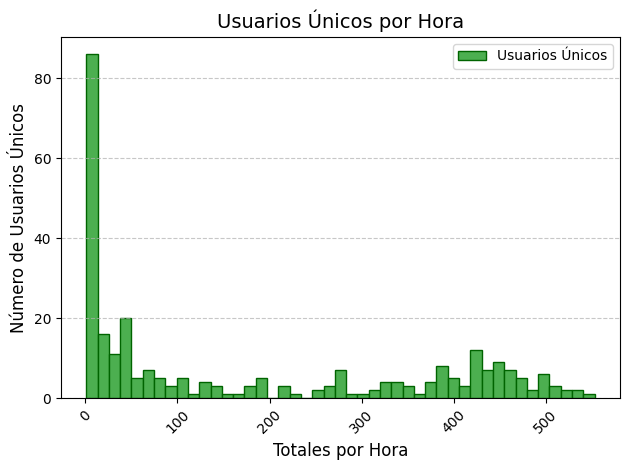

In [59]:
# Configurar el gráfico
plt.figure(figsize=(12, 6))
registros_x_fecha_hora.plot(kind='hist', color='#4CAF50', edgecolor='darkgreen', bins=45) 
plt.title('Usuarios Únicos por Hora', fontsize=14)
plt.xlabel('Totales por Hora', fontsize=12)
plt.ylabel('Número de Usuarios Únicos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Análisis de resultados:

El análisis de usuarios únicos por hora muestra que la actividad alcanzó sus valores más altos en agosto, especialmente el 6 de agosto a las 14:00 con 553 usuarios. Los picos de mayor afluencia se concentran en horas de la tarde (entre las 13:00 y 16:00), lo que indica una tendencia de uso más intensa en este rango horario.

En las fechas previas se observa una gran cantidad de horas con muy baja participación, lo que sugiere que el sistema o los experimentos estaban en fase inicial y no habían alcanzado un flujo estable de usuarios.

A partir de agosto, la actividad se estabiliza con una distribución más consistente, mostrando un aumento sostenido a partir de las 11:00 horas, lo que refleja una mayor adopción y uso del sistema en el periodo analizado.

### 3.5 Total de eventos y usuarios al excluir los datos más antiguos

In [60]:
# Total de eventos y usuarios al excluir los datos más antiguos
# Filtrar por la fecha 2019-07-25 al 2019-07-30
Total_datos_excluidos = clean_registro.query("fecha >= '2019-07-25' and fecha <= '2019-07-29'")[['device_id', 'experimento', 'event_name', 'fecha']]
Total_datos_excluidos.head(5)

,device_id,experimento,event_name,fecha
0,4575588528974610257,246,MainScreenAppear,2019-07-25
1,7416695313311560658,246,MainScreenAppear,2019-07-25
2,3518123091307005509,248,PaymentScreenSuccessful,2019-07-25
3,3518123091307005509,248,CartScreenAppear,2019-07-25
4,6217807653094995999,248,PaymentScreenSuccessful,2019-07-25


In [61]:
# Sacar el total de eventos excluidos
Total_eventos_excluidos = Total_datos_excluidos.groupby('event_name').agg({'device_id': 'nunique'})
Total_eventos_excluidos

,device_id
event_name,
CartScreenAppear,49
MainScreenAppear,195
OffersScreenAppear,41
PaymentScreenSuccessful,27
Tutorial,3


In [62]:
# Sacar el total de usuarios excluidos
Total_usuarios_excluidos = Total_datos_excluidos['device_id'].count()
print(Total_usuarios_excluidos)

323


In [63]:
# Conteo total de los grupos experimentales
Total_usuarios_excluidos = Total_datos_excluidos.groupby('experimento').agg({'device_id': 'nunique'})
Total_usuarios_excluidos

,device_id
experimento,
246,95
247,87
248,84


In [64]:
# DataFrame filtrado cuando los datos comienzan a estar completos
registro_filtrado = clean_registro.query("fecha >= '2019-07-30' and fecha <= '2019-08-07'")[['device_id', 'experimento', 'event_name', 'fecha', 'event_timestamp']]
registro_filtrado.head(3)

,device_id,experimento,event_name,fecha,event_timestamp
384,2255262833937562054,246,MainScreenAppear,2019-07-30,2019-07-30 01:00:00
385,2729404905328132990,248,MainScreenAppear,2019-07-30,2019-07-30 01:00:00
386,6602771251234895823,247,MainScreenAppear,2019-07-30,2019-07-30 02:00:00


### 3.6 Asegúrate de tener usuarios de los tres grupos experimentales.

In [65]:
# Contar usuarios únicos en la columna
conteo_experimento = (
    registro_filtrado
        .groupby('experimento')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Únicos'})
)
conteo_experimento

,Usuarios Únicos
experimento,
246,2487
247,2520
248,2540


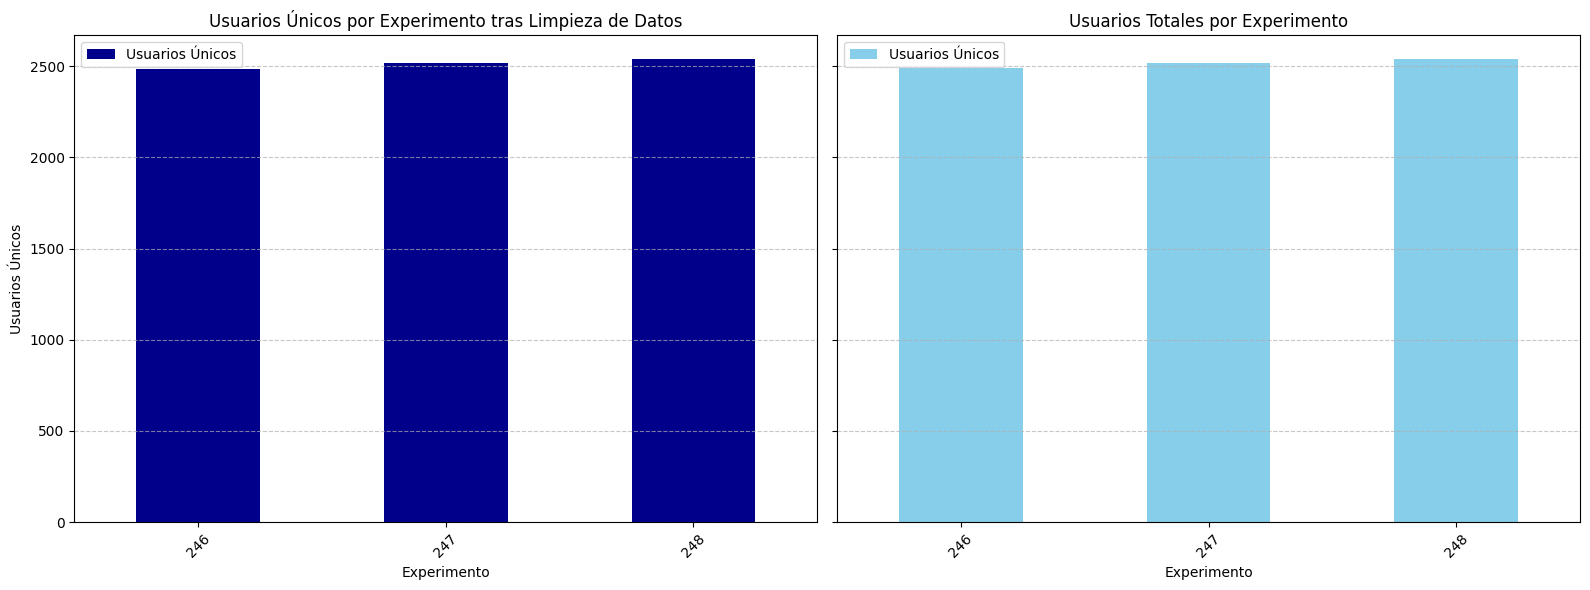

In [66]:
# Configurar el gráfico
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico 1 Datos filtrados por fechas
conteo_experimento.plot(kind='bar', color='darkblue', ax=axs[0])
axs[0].set_title('Usuarios Únicos por Experimento tras Limpieza de Datos')
axs[0].set_xlabel('Experimento')
axs[0].set_ylabel('Usuarios Únicos')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2 Datos originales
total_usuarios.plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Usuarios Totales por Experimento')
axs[1].set_xlabel('Experimento')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Análisis de resultados:

Como se observa en la gráfica, contamos con una cantidad suficiente de usuarios únicos por experimento para continuar con nuestros análisis.

Se decidió excluir los datos del 25 al 29 de julio debido a su bajo volumen de registros. Esta exclusión no afecta la validez del análisis, ya que:

El comportamiento de los usuarios se estabiliza a partir del 30 de julio.

La distribución de usuarios únicos entre los experimentos 246, 247 y 248 es muy similar, con diferencias mínimas:

Experimento 246: 2,487 a 2392 usuarios únicos

Experimento 247: 2,520 a 2433 usuarios únicos

Experimento 248: 2,540 a 2456 usuarios únicos

Estas pequeñas variaciones (<3%) indican que no hay sesgos de asignación relevantes entre los grupos, lo que nos da un punto de partida sólido para analizar el impacto de cada experimento en los eventos posteriores.

## Paso 4. Estudiar el embudo de eventos

### 4.1 Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [67]:
# Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia
funnel_total_eventos = (
    registro_filtrado
        .groupby('event_name')
        .agg(
            total_usuarios =('device_id','count')
        )
    .rename(columns={'total_usuarios': 'Total de Usuarios'})
    .sort_values(by='Total de Usuarios', ascending=False)
)
funnel_total_eventos

,Total de Usuarios
event_name,
MainScreenAppear,44416
OffersScreenAppear,25452
CartScreenAppear,14686
PaymentScreenSuccessful,13079
Tutorial,886


### 4.2 Encuentra la cantidad de usuarios que realizaron cada una de estas acciones.

In [68]:
# Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. 
# Ordena los eventos por el número de usuarios. 
funnel_usuarios_unicos = (
    registro_filtrado
        .groupby('event_name')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Unicos'})
    .sort_values(by='Usuarios Unicos', ascending=False)
)
funnel_usuarios_unicos

,Usuarios Unicos
event_name,
MainScreenAppear,7435
OffersScreenAppear,4612
CartScreenAppear,3747
PaymentScreenSuccessful,3546
Tutorial,845


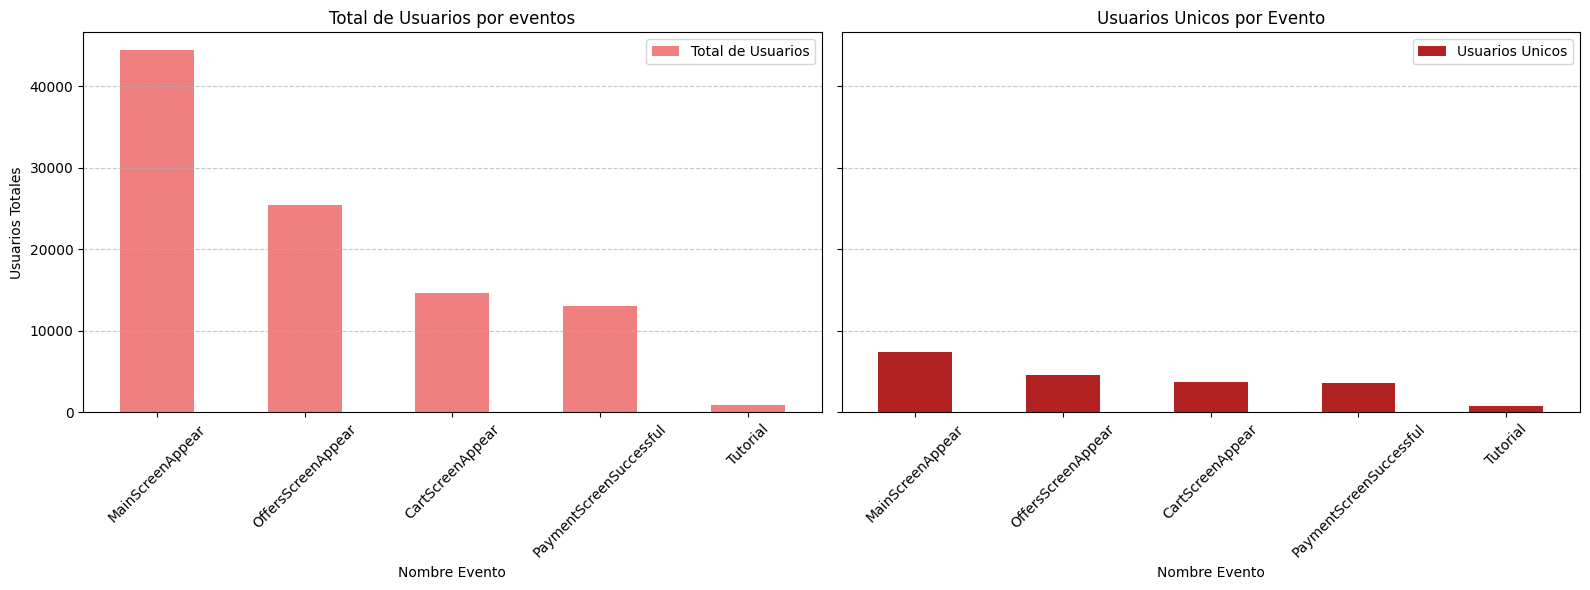

In [69]:
# Graficamos para poder oberservar ambos resultados
# Configurar el gráfico
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico 1 Datos filtrados por fechas
funnel_total_eventos.plot(kind='bar', color='lightcoral', ax=axs[0])
axs[0].set_title('Total de Usuarios por eventos')
axs[0].set_xlabel('Nombre Evento')
axs[0].set_ylabel('Usuarios Totales')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)


# Gráfico 2 Datos originales
funnel_usuarios_unicos.plot(kind='bar', color='firebrick', ax=axs[1])
axs[1].set_title('Usuarios Unicos por Evento')
axs[1].set_xlabel('Nombre Evento')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

#### 4.2.1 Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [70]:
Funnel_eventos = funnel_total_eventos.merge(
        funnel_usuarios_unicos,
        right_on='event_name',
        left_on='event_name',
        suffixes=['_total_usuarios', '_usuarios_unicos']
    )
Funnel_eventos

,Total de Usuarios,Usuarios Unicos
event_name,,
MainScreenAppear,44416,7435
OffersScreenAppear,25452,4612
CartScreenAppear,14686,3747
PaymentScreenSuccessful,13079,3546
Tutorial,886,845


#### 4.2.2 Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [71]:
# Calcula la proporción de usuarios que realizaron la acción al menos una vez.
Funnel_eventos['Proporcion'] = ((Funnel_eventos['Usuarios Unicos'] / Funnel_eventos['Total de Usuarios']) * 100).round(2)
Funnel_eventos

,Total de Usuarios,Usuarios Unicos,Proporcion
event_name,,,
MainScreenAppear,44416,7435,16.74
OffersScreenAppear,25452,4612,18.12
CartScreenAppear,14686,3747,25.51
PaymentScreenSuccessful,13079,3546,27.11
Tutorial,886,845,95.37


#### Análisis de resultados:

Para el análisis del funnel principal de eventos decidí enfocarme únicamente en los eventos OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful y Tutorial. Esta selección se basa en que los tres primeros representan una secuencia clara en el proceso de compra del usuario. El evento OffersScreenAppear indica que el usuario mostró interés al ver las ofertas disponibles. Luego, CartScreenAppear refleja una intención más concreta al ingresar al carrito, y finalmente, PaymentScreenSuccessful marca que la conversión se completó con éxito. Incluí el evento Tutorial como un paso adicional posterior a la compra, ya que algunos usuarios lo exploran luego de haber realizado su pago. Otros eventos presentes en los datos no fueron considerados para este análisis porque no forman parte directa de este flujo de conversión o no aportan información relevante sobre la intención de compra.

In [72]:
# Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente.
Funnel_x_eventos = registro_filtrado.pivot_table(
    index='device_id',
    columns='event_name',
    values='event_timestamp',
    aggfunc='min'
)
Funnel_x_eventos.head(3)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id,,,,,
6888746892508752,NaT,2019-08-06 14:00:00,NaT,NaT,NaT
6909561520679493,2019-08-06 18:00:00,2019-08-06 18:00:00,2019-08-06 18:00:00,2019-08-06 18:00:00,NaT
6922444491712477,2019-08-04 14:00:00,2019-08-04 14:00:00,2019-08-04 14:00:00,2019-08-04 14:00:00,NaT


### 4.3 Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. ¿En qué etapa pierdes más usuarios? ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [73]:
# Trazar el embudo
paso1 = ~Funnel_x_eventos['MainScreenAppear'].isna()
paso2 = paso1 & (Funnel_x_eventos['OffersScreenAppear'] > Funnel_x_eventos['MainScreenAppear'])
paso3 = paso2 & (Funnel_x_eventos['CartScreenAppear'] > Funnel_x_eventos['OffersScreenAppear'])
paso4 = paso3 & (Funnel_x_eventos['PaymentScreenSuccessful'] > Funnel_x_eventos['CartScreenAppear'])

n_MainScreenAppear = Funnel_x_eventos[paso1].shape[0]
n_OffersScreenAppear = Funnel_x_eventos[paso2].shape[0]
n_CartScreenAppear = Funnel_x_eventos[paso3].shape[0]
n_PaymentScreenSuccessful = Funnel_x_eventos[paso4].shape[0]

print('Main Screen Appear:', n_MainScreenAppear)
print('Offers Screen Appear:', n_OffersScreenAppear)
print('Cart Screen Appear:',n_CartScreenAppear)
print('Payment Screen Successful:',n_CartScreenAppear)


Main Screen Appear: 7435
Offers Screen Appear: 1232
Cart Screen Appear: 180
Payment Screen Successful: 180


#### Análisis de resultados:

El análisis del embudo muestra una caída notable en la conversión entre la pantalla de ofertas (Offers Screen Appear) y el carrito de compras (Cart Screen Appear), lo que indica un punto crítico de fuga.

##### Hallazgos principales:

Solo 180 usuarios (22.5%) completan todo el recorrido desde la pantalla principal hasta una compra exitosa.

La mayor pérdida ocurre en la transición de Offers Screen a Cart Screen, donde más de la mitad de los usuarios no continúa con el flujo.

##### Recomendación:

Es importante revisar y optimizar la experiencia en la sección de ofertas. Mejorar el diseño, la claridad de los beneficios o la relevancia de los productos mostrados podría incrementar la tasa de conversión hacia la compra.

## Paso 5. Estudiar los resultados del experimento

### 5.1 Cantidad de usuarios que hay en cada grupo

In [74]:
# Agrupar por experimentos
experimento_totales = (
    registro_filtrado
        .groupby('experimento')
        .agg(
            total_usuarios =('device_id','nunique')
        )
    .rename(columns={'total_usuarios': 'Usuarios Únicos'})
)
experimento_totales

,Usuarios Únicos
experimento,
246,2487
247,2520
248,2540


#### Comparación entre grupos del experimento

Podemos observar que la cantidad de usuarios únicos por experimento es bastante similar, lo cual es positivo. Esto indica que la asignación a los grupos fue equilibrada y no hubo sesgos significativos en la distribución.

La diferencia entre grupos es mínima, por lo tanto, los resultados que se obtengan al comparar su comportamiento serán más confiables, ya que cada grupo representa poblaciones equivalentes en tamaño.

### 5.2 Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [82]:
usuarios_246 = registro_filtrado.query("experimento == 246").groupby('device_id')['event_name'].count()
usuarios_247 = registro_filtrado.query("experimento == 247").groupby('device_id')['event_name'].count()

In [89]:
# Student's t-test para muestras independientes
alpha = 0.05
t_stat, p_value = st.ttest_ind(usuarios_246, usuarios_247, equal_var=False)
print('valor p:', p_value)
print('t_stat:', t_stat)

if p_value < alpha:
    print("Rechazamos H0: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza H0: no hay diferencias significativas.")

valor p: 0.9745851216510192
t_stat: 0.031859808020816525
No se rechaza H0: no hay diferencias significativas.


#### Análisis de resultados:

Los grupos 246 y 247 se comportan prácticamente igual. No hay diferencias significativas en los resultados, lo que indica que el sistema de medición y el muestreo están funcionando correctamente.

### 5.3 Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción.

In [103]:
# Funcion para Z-test de las proporciones de cada evento por experimento
def z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.05):
    proporcion1 = Funnel_exp1 / exp_1_total
    proporcion2 = Funnel_exp2 / exp_2_total
    proporcion_combinada = (Funnel_exp1 + Funnel_exp2) / (exp_1_total + exp_2_total)
    #Estadistico Z
    z_value = (proporcion1 - proporcion2) / mth.sqrt(proporcion_combinada * (1 - proporcion_combinada) * (1/exp_1_total + 1/exp_2_total))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    return {
        "evento": evento,
        "usuarios_grupo1": Funnel_exp1,
        "usuarios_grupo2": Funnel_exp2,
        "proporcion_grupo1": round(proporcion1*100, 2),
        "proporcion_grupo2": round(proporcion2*100, 2),
        "p_value": round(p_value, 5),
        "significativo": p_value < alpha
    }

# Datos base experimento 246 vs 247
eventos = registro_filtrado['event_name'].unique()
exp_1_total = registro_filtrado.query("experimento == 246")['device_id'].nunique()
exp_2_total = registro_filtrado.query("experimento == 247")['device_id'].nunique()

# Aplicar para todos los eventos
resultados = []
for evento in eventos:
    Funnel_exp1 = registro_filtrado.query("experimento == 246 and event_name == @evento")['device_id'].nunique()
    Funnel_exp2 = registro_filtrado.query("experimento == 247 and event_name == @evento")['device_id'].nunique()
    resultados.append(z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.05))

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,evento,usuarios_grupo1,usuarios_grupo2,proporcion_grupo1,proporcion_grupo2,p_value,significativo
0,MainScreenAppear,2454,2482,98.67,98.49,0.58801,False
1,OffersScreenAppear,1545,1529,62.12,60.67,0.29253,False
2,CartScreenAppear,1269,1240,51.03,49.21,0.19806,False
3,PaymentScreenSuccessful,1202,1160,48.33,46.03,0.10315,False
4,Tutorial,278,285,11.18,11.31,0.88301,False


#### Análisis de resultados:

Las proporciones de usuarios que realizaron cada evento son prácticamente iguales en ambos grupos. Con p-valores muy por encima de 0.05 en todos los casos, no se rechaza la hipótesis nula, lo que confirma que los grupos se dividieron correctamente y que no hay sesgo entre ellos.

### 5.4 Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control.

In [110]:
# Datos base del experimento 246 vs 248
eventos = registro_filtrado['event_name'].unique()
exp_1_total = registro_filtrado.query("experimento == 246")['device_id'].nunique()
exp_2_total = registro_filtrado.query("experimento == 248")['device_id'].nunique()

# Aplicar para todos los eventos
resultados = []
for evento in eventos:
    Funnel_exp1 = registro_filtrado.query("experimento == 246 and event_name == @evento")['device_id'].nunique()
    Funnel_exp2 = registro_filtrado.query("experimento == 248 and event_name == @evento")['device_id'].nunique()
    resultados.append(z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.05))

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,evento,usuarios_grupo1,usuarios_grupo2,proporcion_grupo1,proporcion_grupo2,p_value,significativo
0,MainScreenAppear,2454,2499,98.67,98.39,0.39779,False
1,OffersScreenAppear,1545,1538,62.12,60.55,0.25256,False
2,CartScreenAppear,1269,1238,51.03,48.74,0.10520,False
3,PaymentScreenSuccessful,1202,1184,48.33,46.61,0.22285,False
4,Tutorial,278,282,11.18,11.10,0.93197,False


In [112]:
# Datos base para los experimentos 247 vs 248
eventos = registro_filtrado['event_name'].unique()
exp_1_total = registro_filtrado.query("experimento == 247")['device_id'].nunique()
exp_2_total = registro_filtrado.query("experimento == 248")['device_id'].nunique()

# Aplicar para todos los eventos
resultados = []
for evento in eventos:
    Funnel_exp1 = registro_filtrado.query("experimento == 247 and event_name == @evento")['device_id'].nunique()
    Funnel_exp2 = registro_filtrado.query("experimento == 248 and event_name == @evento")['device_id'].nunique()
    resultados.append(z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.05))

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,evento,usuarios_grupo1,usuarios_grupo2,proporcion_grupo1,proporcion_grupo2,p_value,significativo
0,MainScreenAppear,2482,2499,98.49,98.39,0.76053,False
1,OffersScreenAppear,1529,1538,60.67,60.55,0.92841,False
2,CartScreenAppear,1240,1238,49.21,48.74,0.74013,False
3,PaymentScreenSuccessful,1160,1184,46.03,46.61,0.67783,False
4,Tutorial,285,282,11.31,11.10,0.81531,False


#### Análisis de resultados:

Se compararon los experimentos 246 y 247 contra el grupo 248, evaluando cinco eventos clave en el flujo de usuarios. Las proporciones de usuarios que completaron cada evento entre los grupos fueron muy similares, con diferencias inferiores a dos puntos porcentuales.

Los valores de p-value obtenidos para cada evento fueron mayores a 0.05, lo que indica que no existen diferencias estadísticamente significativas entre los grupos. Por lo tanto, no hay evidencia suficiente para afirmar que las variantes 246 y 247 hayan generado un cambio relevante en el comportamiento del usuario respecto al grupo base 248.

Dado el tamaño considerable de las muestras y la consistencia de los resultados, se concluye que, si existe algún efecto, este es muy pequeño o inexistente en las métricas analizadas. Se recomienda considerar otras métricas o analizar segmentos específicos de usuarios para detectar posibles impactos que no sean evidentes en este análisis general.

### 5.5 Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [115]:
# Datos base experimento 246 vs 247
eventos = registro_filtrado['event_name'].unique()
exp_1_total = registro_filtrado.query("experimento == 246")['device_id'].nunique()
exp_2_total = registro_filtrado.query("experimento == 247")['device_id'].nunique()

# Aplicar para todos los eventos
resultados = []
for evento in eventos:
    Funnel_exp1 = registro_filtrado.query("experimento == 246 and event_name == @evento")['device_id'].nunique()
    Funnel_exp2 = registro_filtrado.query("experimento == 247 and event_name == @evento")['device_id'].nunique()
    resultados.append(z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.1))

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,evento,usuarios_grupo1,usuarios_grupo2,proporcion_grupo1,proporcion_grupo2,p_value,significativo
0,MainScreenAppear,2454,2482,98.67,98.49,0.58801,False
1,OffersScreenAppear,1545,1529,62.12,60.67,0.29253,False
2,CartScreenAppear,1269,1240,51.03,49.21,0.19806,False
3,PaymentScreenSuccessful,1202,1160,48.33,46.03,0.10315,False
4,Tutorial,278,285,11.18,11.31,0.88301,False


In [113]:
# Datos base del experimento 246 vs 248
eventos = registro_filtrado['event_name'].unique()
exp_1_total = registro_filtrado.query("experimento == 246")['device_id'].nunique()
exp_2_total = registro_filtrado.query("experimento == 248")['device_id'].nunique()

# Aplicar para todos los eventos
resultados = []
for evento in eventos:
    Funnel_exp1 = registro_filtrado.query("experimento == 246 and event_name == @evento")['device_id'].nunique()
    Funnel_exp2 = registro_filtrado.query("experimento == 248 and event_name == @evento")['device_id'].nunique()
    resultados.append(z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.1))

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,evento,usuarios_grupo1,usuarios_grupo2,proporcion_grupo1,proporcion_grupo2,p_value,significativo
0,MainScreenAppear,2454,2499,98.67,98.39,0.39779,False
1,OffersScreenAppear,1545,1538,62.12,60.55,0.25256,False
2,CartScreenAppear,1269,1238,51.03,48.74,0.10520,False
3,PaymentScreenSuccessful,1202,1184,48.33,46.61,0.22285,False
4,Tutorial,278,282,11.18,11.10,0.93197,False


In [114]:
# Datos base para los experimentos 247 vs 248
eventos = registro_filtrado['event_name'].unique()
exp_1_total = registro_filtrado.query("experimento == 247")['device_id'].nunique()
exp_2_total = registro_filtrado.query("experimento == 248")['device_id'].nunique()

# Aplicar para todos los eventos
resultados = []
for evento in eventos:
    Funnel_exp1 = registro_filtrado.query("experimento == 247 and event_name == @evento")['device_id'].nunique()
    Funnel_exp2 = registro_filtrado.query("experimento == 248 and event_name == @evento")['device_id'].nunique()
    resultados.append(z_test_proporciones(evento, Funnel_exp1, Funnel_exp2, exp_1_total, exp_2_total, alpha=0.1))

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,evento,usuarios_grupo1,usuarios_grupo2,proporcion_grupo1,proporcion_grupo2,p_value,significativo
0,MainScreenAppear,2482,2499,98.49,98.39,0.76053,False
1,OffersScreenAppear,1529,1538,60.67,60.55,0.92841,False
2,CartScreenAppear,1240,1238,49.21,48.74,0.74013,False
3,PaymentScreenSuccessful,1160,1184,46.03,46.61,0.67783,False
4,Tutorial,285,282,11.31,11.10,0.81531,False


#### Análisis de resultados:

Al comparar los experimentos 246, 247 y 248 con un nivel de significancia de 0.1, los resultados muestran que no hay diferencias estadísticamente significativas en ninguno de los eventos evaluados. Esto confirma que cambiar el umbral de 0.05 a 0.1 no altera la conclusión: las variantes no impactan el comportamiento de usuario medido.

Se recomienda explorar otras métricas o segmentaciones para identificar posibles efectos que no se reflejan en este análisis.

## Conclusión final

Tras analizar los experimentos 246, 247 y 248 con un nivel de significancia estándar de 0.05, se concluye que no existen diferencias estadísticamente significativas en los eventos evaluados entre los grupos. Los p-values obtenidos en las comparaciones son superiores al umbral establecido, lo que indica que las variantes probadas no generan un impacto relevante en el comportamiento de los usuarios medido en estos eventos.

Además, aumentar el nivel de significancia a 0.1 tampoco altera esta conclusión, por lo que se mantiene la recomendación de utilizar α = 0.05 para un balance adecuado entre falsos positivos y falsos negativos.

Por lo tanto, se recomienda considerar nuevas variables de análisis, realizar estudios en subgrupos específicos o incrementar la cantidad de datos para poder detectar posibles impactos que no fueron evidentes en este estudio.